In [0]:
from keras import regularizers
import pandas as pd 
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import tensorflow as tf
import keras
from keras.layers import Conv2D,MaxPool2D,BatchNormalization,Dense,Activation,Flatten,Input,Dropout,UpSampling2D,Conv2DTranspose,MaxPooling2D,Reshape
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential,Model
import os

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
s = 0
Ximg = []
pathfordefectiveimages = 'gdrive/My Drive/defective images'
for image in os.listdir(pathfordefectiveimages):
  Ximg.append(cv2.imread(os.path.join(pathfordefectiveimages,image),0))
  s+=1
  if s%50 == 0:
    print(s)

50
100
150
200
250
300
350
400
450
500
550
600


In [0]:
len(Ximg)

613

In [0]:
Ximgaug = []
p = 0
pathforaugdefectiveimages = 'gdrive/My Drive/augment_test4'
for image in os.listdir(pathforaugdefectiveimages):
  Ximgaug.append(cv2.imread(os.path.join(pathforaugdefectiveimages,image),0))
  p+=1
  if p%100 == 0:
    print(p)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800


In [0]:
len(Ximgaug)

12861

In [0]:
Xnodef = []
l = 0
pathfornondefectiveimages = 'gdrive/My Drive/nondefectiveimage'
for image in os.listdir(pathfornondefectiveimages):
  Xnodef.append(cv2.imread(os.path.join(pathfornondefectiveimages,image),0))
  l+=1
  if l%100 == 0:
    print(l)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800


In [0]:
Xdimg = Ximg+Ximgaug

In [0]:
len(Xdimg)

13474

In [0]:
from keras import backend as K

def kl_divergence(rho, rho_hat):
    return rho * tf.log(rho) - rho * tf.log(rho_hat) + (1 - rho) * tf.log(1 - rho) - (1 - rho) * tf.log(1 - rho_hat)

class SparseActivityRegularizer():

    def __init__(self, p=0.1, sparsityBeta=3):
        self.p = p
        self.sparsityBeta = sparsityBeta

    def __call__(self, x):
        regularization = 0            

        p_hat = K.mean(x, axis=0)
        regularization += self.sparsityBeta * K.sum(kl_divergence(self.p, p_hat))

        return regularization

    def get_config(self):
        return {"name": self.__class__.__name__} 

In [0]:
def create_model1():
  model1 = Sequential()
  regularizer = SparseActivityRegularizer(0.1, 3)
  model1.add(Dense(576,activation='sigmoid',input_shape=(1024,), activity_regularizer=regularizer,kernel_regularizer=regularizers.l2(4e-3)))
  model1.add(Dense(1024,activation='sigmoid'))
  model1.compile(loss = 'mse',optimizer='sgd')
  return model1

In [0]:
model1 = create_model1()

W0702 09:13:23.265771 140556096931712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0702 09:13:23.318480 140556096931712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0702 09:13:23.326557 140556096931712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0702 09:13:23.394161 140556096931712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 576)               590400    
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              590848    
Total params: 1,181,248
Trainable params: 1,181,248
Non-trainable params: 0
_________________________________________________________________


In [0]:
len(Xnodef)

20401

In [0]:
Xdimg = np.array(Xdimg)
Xdimg = Xdimg.reshape(13474,1024)
print(Xdimg.shape)
Xnodef = np.array(Xnodef)
Xnodef = Xnodef.reshape(20401,1024)
print(Xnodef.shape)

(13474, 1024)
(20401, 1024)


In [0]:
Xwithdef = np.copy(Xdimg)

In [0]:
Xwithnodef = np.copy(Xnodef)

In [0]:
Xwithdef = Xwithdef/255

In [0]:
Xwithnodef = Xwithnodef/255

In [0]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(       
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True)

In [0]:
k=0
for x in Ximg:
  x = x.reshape((1,) + x.shape)
  x = x.T
  x = x.reshape((1,) + x.shape)
  i = 0
  for batch in datagen.flow(x, batch_size=1,save_to_dir='gdrive/My Drive/augment_test4', save_prefix='aug'+str(k)+'img', save_format='jpeg'):
      i += 1
      if i > 20:
          break
  k+=1

In [0]:
from keras.callbacks import ReduceLROnPlateau,ModelCheckpoint
reduce_lr1 = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               verbose=1,
                               min_lr=0.5e-10)
filepath1="weights-improvement-model1-{epoch:02d}-{val_loss:.7f}.hdf5"
checkpoint1 = ModelCheckpoint(filepath1, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

model1.fit(Xwithdef,Xwithdef,shuffle = True,epochs =200,batch_size=16,validation_split=0.1,callbacks=[reduce_lr1,checkpoint1])

W0702 09:13:53.511312 140556096931712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0702 09:13:53.656602 140556096931712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 12126 samples, validate on 1348 samples
Epoch 1/200
12126/12126 [==============================] - 7s 595us/step - loss: 21.8583 - val_loss: 7.7010

Epoch 00001: val_loss improved from inf to 7.70105, saving model to weights-improvement-model1-01-7.7010475.hdf5
Epoch 2/200
12126/12126 [==============================] - 4s 297us/step - loss: 18.4494 - val_loss: 5.4243

Epoch 00002: val_loss improved from 7.70105 to 5.42428, saving model to weights-improvement-model1-02-5.4242765.hdf5
Epoch 3/200
12126/12126 [==============================] - 4s 300us/step - loss: 14.6990 - val_loss: 25.2548

Epoch 00003: val_loss did not improve from 5.42428
Epoch 4/200
12126/12126 [==============================] - 4s 301us/step - loss: 15.1453 - val_loss: 8.2518

Epoch 00004: val_loss did not improve from 5.42428
Epoch 5/200
12126/12126 [==============================] - 4s 302us/step - loss: 18.2774 - val_loss: 17.0268

Epoch 00005: val_loss did not improve from 5.42428
Epoch 6/200
12126/121

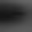

[[ 74.  73.  74. ... 103. 102. 102.]
 [ 71.  71.  71. ... 101. 101. 101.]
 [ 66.  65.  66. ...  98.  98.  98.]
 ...
 [ 79.  79.  79. ...  92.  92.  92.]
 [ 80.  80.  80. ...  92.  92.  92.]
 [ 81.  81.  81. ...  92.  92.  92.]]
[[139.366   181.2134  169.05621 ... 162.78781 155.05482 172.46484]
 [158.91826 182.08127 148.74643 ... 161.9613  173.64238 147.84808]
 [189.23067 159.8553  173.68306 ... 150.22064 160.05414 165.48672]
 ...
 [157.0677  145.30005 154.84926 ... 152.36601 175.16786 170.4304 ]
 [166.8719  153.88663 148.98424 ... 142.14188 152.38602 171.9929 ]
 [186.77116 146.08662 137.42708 ... 154.15688 161.67819 164.93777]]


In [0]:
model1 = create_model1()
model1.load_weights('weights-improvement-model1-73-1.9574573.hdf5')
image = Xwithdef[0:1].copy()
predictions = model1.predict(np.array(image))
image = image*255
image = image.reshape(32,32)
cv2_imshow(image)
predimage = predictions[0]*255
predimage = predimage.reshape(32,32)
cv2_imshow(predimage)
print(image)
print(predimage)

In [0]:
auto1 = Sequential()
auto1.add(model1.layers[0])
auto1.layers[0].trainable = False
auto1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 576)               590400    
Total params: 590,400
Trainable params: 0
Non-trainable params: 590,400
_________________________________________________________________


In [0]:
def create_model2():
  model2 = Sequential()
  model2.add(model1.layers[0])
  regularizer = SparseActivityRegularizer(0.1, 3)
  model2.add(Dense(196,activation='sigmoid', activity_regularizer=regularizer,kernel_regularizer=regularizers.l2(4e-3)))
  model2.add(Dense(576,activation='sigmoid'))
  model2.compile(loss='mse',optimizer='sgd')
  model2.layers[0].trainable = False
  return model2

In [0]:
model2 = create_model2()
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 576)               590400    
_________________________________________________________________
dense_5 (Dense)              (None, 196)               113092    
_________________________________________________________________
dense_6 (Dense)              (None, 576)               113472    
Total params: 816,964
Trainable params: 226,564
Non-trainable params: 590,400
_________________________________________________________________


In [0]:
reduce_lr2 = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               verbose=1,
                               min_lr=0.5e-6)
filepath2="weights-improvement-model-2-{epoch:02d}-{val_loss:.7f}.hdf5"
checkpoint2 = ModelCheckpoint(filepath2, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

model2.fit(Xwithdef,auto1.predict(Xwithdef),epochs=400,shuffle=True,batch_size=16,validation_split=0.1,callbacks = [checkpoint2,reduce_lr2])

Train on 12126 samples, validate on 1348 samples
Epoch 1/400
12126/12126 [==============================] - 3s 278us/step - loss: 6.9991 - val_loss: 4.8196

Epoch 00001: val_loss improved from inf to 4.81958, saving model to weights-improvement-model-2-01-4.8195770.hdf5
Epoch 2/400
12126/12126 [==============================] - 3s 281us/step - loss: 2.6223 - val_loss: 4.6378

Epoch 00002: val_loss improved from 4.81958 to 4.63780, saving model to weights-improvement-model-2-02-4.6378027.hdf5
Epoch 3/400
12126/12126 [==============================] - 3s 283us/step - loss: 2.5359 - val_loss: 4.5026

Epoch 00003: val_loss improved from 4.63780 to 4.50257, saving model to weights-improvement-model-2-03-4.5025742.hdf5
Epoch 4/400
12126/12126 [==============================] - 3s 276us/step - loss: 2.3785 - val_loss: 4.3668

Epoch 00004: val_loss improved from 4.50257 to 4.36683, saving model to weights-improvement-model-2-04-4.3668268.hdf5
Epoch 5/400
12126/12126 [==========================

In [0]:
auto2 = Sequential()
for layer in model2.layers[:-1]:
  auto2.add(layer)

In [0]:
auto2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 576)               590400    
_________________________________________________________________
dense_5 (Dense)              (None, 196)               113092    
Total params: 703,492
Trainable params: 113,092
Non-trainable params: 590,400
_________________________________________________________________


In [0]:
def create_model3():
  model3 = Sequential()
  for layer in model2.layers[:-1]:
    model3.add(layer)
  regularizer = SparseActivityRegularizer(0.1, 3)
  model3.add(Dense(100,activation='sigmoid', activity_regularizer=regularizer,kernel_regularizer=regularizers.l2(4e-3)))
  model3.add(Dense(196,activation='sigmoid'))
  model3.layers[0].trainable = False
  model3.layers[1].trainable = False
  model3.compile(loss='mse',optimizer='sgd')
  return model3

In [0]:
model3 = create_model3()
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 576)               590400    
_________________________________________________________________
dense_5 (Dense)              (None, 196)               113092    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               19700     
_________________________________________________________________
dense_8 (Dense)              (None, 196)               19796     
Total params: 742,988
Trainable params: 39,496
Non-trainable params: 703,492
_________________________________________________________________


In [0]:
reduce_lr3 = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               verbose=1,
                               min_lr=0.5e-6)
filepath3="weights-improvement-model3-{epoch:02d}-{val_loss:.7f}.hdf5"
checkpoint3 = ModelCheckpoint(filepath3, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
model3.fit(Xwithdef,auto2.predict(Xwithdef),epochs=400,shuffle=True,batch_size=16,validation_split=0.1,callbacks = [reduce_lr3,checkpoint3])

Train on 12126 samples, validate on 1348 samples
Epoch 1/400
12126/12126 [==============================] - 3s 288us/step - loss: 6.6035 - val_loss: 2.8558

Epoch 00001: val_loss improved from inf to 2.85578, saving model to weights-improvement-model3-01-2.8557846.hdf5
Epoch 2/400
12126/12126 [==============================] - 4s 290us/step - loss: 1.9028 - val_loss: 2.7833

Epoch 00002: val_loss improved from 2.85578 to 2.78330, saving model to weights-improvement-model3-02-2.7832965.hdf5
Epoch 3/400
12126/12126 [==============================] - 4s 292us/step - loss: 1.7550 - val_loss: 2.7176

Epoch 00003: val_loss improved from 2.78330 to 2.71763, saving model to weights-improvement-model3-03-2.7176316.hdf5
Epoch 4/400
12126/12126 [==============================] - 4s 292us/step - loss: 1.7306 - val_loss: 2.6580

Epoch 00004: val_loss improved from 2.71763 to 2.65802, saving model to weights-improvement-model3-04-2.6580164.hdf5
Epoch 5/400
12126/12126 [==============================

In [0]:
model3 = create_model3()
model3.load_weights('weights-improvement-model3-396-1.8267559.hdf5')

In [0]:
finalautomodel = Sequential()
for layer in model3.layers[:-1]:
  finalautomodel.add(layer)

In [0]:
finalautomodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 576)               590400    
_________________________________________________________________
dense_5 (Dense)              (None, 196)               113092    
_________________________________________________________________
dense_9 (Dense)              (None, 100)               19700     
Total params: 723,192
Trainable params: 19,700
Non-trainable params: 703,492
_________________________________________________________________


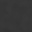

[25.511747 25.511633 25.511908 25.510752 25.512781 25.512827 25.511671
 25.512007 25.512493 25.510714 25.513115 25.511976 25.51085  25.512606
 25.51234  25.512629 25.512188 25.511549 25.5112   25.512743 25.51085
 25.511747 25.510303 25.511154 25.511505 25.5112   25.512651 25.511923
 25.512379 25.511557 25.512386 25.51241  25.511528 25.512522 25.511139
 25.513329 25.511154 25.511679 25.510721 25.510843 25.512402 25.511923
 25.511398 25.51282  25.51202  25.51069  25.51193  25.510927 25.511633
 25.512241 25.51174  25.511549 25.512035 25.51212  25.512188 25.511337
 25.513054 25.51107  25.51133  25.511976 25.51133  25.512203 25.513777
 25.512318 25.512295 25.512598 25.5112   25.51098  25.511724 25.512432
 25.5112   25.511992 25.51187  25.51177  25.511877 25.511398 25.51146
 25.51244  25.511398 25.511139 25.512522 25.511139 25.512796 25.511549
 25.511808 25.512257 25.511808 25.512287 25.51244  25.51174  25.51218
 25.512302 25.511908 25.512356 25.512568 25.511847 25.511953 25.511284
 25.51124

In [0]:
image = Xwithnodef[0:1].copy()
predictions = finalautomodel.predict(np.array(image))
image = image*255
image = image.reshape(32,32)
cv2_imshow(image)
preds = predictions[0]

preds = preds*255
print(preds)
preds = preds.reshape(10,10)
cv2_imshow(preds)

In [0]:
def create_finalmodel():
  finalmodel = Sequential()
  for layer in finalautomodel.layers:
    finalmodel.add(layer)
  for i in range(len(finalautomodel.layers)):
    finalmodel.layers[i].trainable=False
  finalmodel.add(Dense(2,activation='softmax',kernel_regularizer=regularizers.l2(4e-3)))
  return finalmodel

In [0]:
finalmodel = create_finalmodel()

In [0]:
finalmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 576)               590400    
_________________________________________________________________
dense_5 (Dense)              (None, 196)               113092    
_________________________________________________________________
dense_9 (Dense)              (None, 100)               19700     
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 202       
Total params: 723,394
Trainable params: 202
Non-trainable params: 723,192
_________________________________________________________________


In [0]:
import random
random.shuffle(Xwithnodef)

In [0]:
Ywithdef = [[1,0]]*13474
len(Ywithdef)

13474

In [0]:
Ywithnodef = [[0,1]]*20401
len(Ywithnodef)

20401

In [0]:
Xtrain= []
Xvalidation=[]
for defective in Xwithdef[:13000]:
  Xtrain.append(defective)
for i in range(13000):
  Xtrain.append(Xwithnodef[i])
for defective in Xwithdef[13000:]:
  Xvalidation.append(defective)
for i in range(13000,13474):
  Xvalidation.append(Xwithnodef[i])


In [0]:
Ytrain = Ywithdef[:13000] + Ywithnodef[:13000]

In [0]:
Yvalidation = Ywithdef[13000:] + Ywithnodef[13000:13474]

In [0]:
len(Xtrain),len(Ytrain)

(26000, 26000)

In [0]:
from sklearn.utils import shuffle

In [0]:
Xtrain, Ytrain = shuffle(Xtrain, Ytrain, random_state=0)

In [0]:
Xtrain = np.array(Xtrain)
Ytrain = np.array(Ytrain)
Xvalidation = np.array(Xvalidation)
Yvalidation = np.array(Yvalidation)

In [0]:
reduce_lrfinal = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               verbose=1,
                               min_lr=0.5e-6)
filepathfinal="weights-improvement-modelfinal-{epoch:02d}-{val_acc:.7f}.hdf5"
checkpointfinal = ModelCheckpoint(filepathfinal, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
finalmodel.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
finalmodel.fit(Xtrain,Ytrain,shuffle=True,epochs=400,batch_size=16,validation_data=(Xvalidation,Yvalidation),callbacks=[reduce_lrfinal,checkpointfinal])

Train on 26000 samples, validate on 948 samples
Epoch 1/400
26000/26000 [==============================] - 8s 300us/step - loss: 93.2723 - acc: 0.5059 - val_loss: 139.0415 - val_acc: 0.5000

Epoch 00001: val_acc improved from -inf to 0.50000, saving model to weights-improvement-modelfinal-01-0.5000000.hdf5
Epoch 2/400
26000/26000 [==============================] - 8s 290us/step - loss: 93.2098 - acc: 0.5003 - val_loss: 139.0385 - val_acc: 0.5000

Epoch 00002: val_acc did not improve from 0.50000
Epoch 3/400
26000/26000 [==============================] - 7s 287us/step - loss: 93.0893 - acc: 0.5027 - val_loss: 139.0359 - val_acc: 0.5000

Epoch 00003: val_acc did not improve from 0.50000
Epoch 4/400
26000/26000 [==============================] - 8s 289us/step - loss: 93.0426 - acc: 0.5005 - val_loss: 139.0344 - val_acc: 0.5000

Epoch 00004: val_acc did not improve from 0.50000
Epoch 5/400
26000/26000 [==============================] - 7s 286us/step - loss: 93.2087 - acc: 0.4985 - val_loss

KeyboardInterrupt: ignored

In [0]:
finalmodel = create_finalmodel()
finalmodel.load_weights('weights-improvement-modelfinal-55-0.9799629.hdf5')
count=0
for i in range(15000,20000):  
  image = Xwithnodef[i:i+1].copy()
  predictions = finalmodel.predict(np.array(image))
  image = image*255
  image = image.reshape(32,32)
  #cv2_imshow(image)
  a = (np.argmax(predictions))
  #print(a)
  if a == 1:
    count+=1
print(count)

4953


In [0]:
import random
from keras import regularizers
import pandas as pd 
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import tensorflow as tf
import keras
from keras.layers import Conv2D,MaxPool2D,BatchNormalization,Dense,Activation,Flatten,Input,Dropout,UpSampling2D,Conv2DTranspose,MaxPooling2D,Reshape
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential,Model
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
def create_patches(img,finalmodel,a):
  h = img.shape[0]
  w = img.shape[1]
  i=32
  while(i<h):
    j=32
    while(j<w):
      simg = img[i-32:i,j-32:j]
      simg = np.array(simg)
      #print(simg.shape)
      simg = simg.reshape(1,1024)
      predictions = finalmodel.predict(simg)
      flag = np.argmax(predictions)
      if flag==0:
        for k in range(i-32,i):
          for l in range(j-32,j):
            a[k][l] = a[k][l]+1
      j+=2
      #print('j=',j)
    #print('i=',i)
    i+=2  
  plt.figure(figsize=(h, w), dpi=10)
  ax = sns.heatmap(a,xticklabels=False,yticklabels=False,square=True,cbar=False)
  return (ax,a)

In [0]:
imagetopredict = cv2.imread('crp_1.png',0)

In [0]:
imagetopredict = imagetopredict/255

In [0]:
h = imagetopredict.shape[0]
w = imagetopredict.shape[1]
a = np.zeros((h,w)) 
result = create_patches(imagetopredict,finalmodel,a)